# Solemne 3 y Recuperativa
### LSTM para Estacion Meteorologica

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras

In [12]:
df = pd.read_csv('../data.csv')
df

,fecha,gas,temperatura,humedad,luminosidad,presion
0,1731686936454,592,28,47,485,94.76
1,1731686997476,765,28,46,529,94.76
2,1731687058489,695,28,46,508,94.76
3,1731687119511,535,28,46,510,94.77
4,1731687180982,528,28,46,510,94.76
...,...,...,...,...,...,...
8938,1732232384753,2905,27,41,307,95.11
8939,1732232445443,3103,27,41,310,95.11
8940,1732232506926,2868,27,41,311,95.11
8941,1732232568043,3055,27,41,330,95.11


# Transformar fechas Unix a datetime

In [13]:
from datetime import datetime
lista_fechas = []
for i in df["fecha"]:
    timestamp = i / 1000
    date_time = datetime.fromtimestamp(timestamp)
    lista_fechas.append(date_time)


df["fecha_unix"] = df["fecha"]
df["fecha"] = lista_fechas

df

,fecha,gas,temperatura,humedad,luminosidad,presion,fecha_unix
0,2024-11-15 13:08:56.454,592,28,47,485,94.76,1731686936454
1,2024-11-15 13:09:57.476,765,28,46,529,94.76,1731686997476
2,2024-11-15 13:10:58.489,695,28,46,508,94.76,1731687058489
3,2024-11-15 13:11:59.511,535,28,46,510,94.77,1731687119511
4,2024-11-15 13:13:00.982,528,28,46,510,94.76,1731687180982
...,...,...,...,...,...,...,...
8938,2024-11-21 20:39:44.753,2905,27,41,307,95.11,1732232384753
8939,2024-11-21 20:40:45.443,3103,27,41,310,95.11,1732232445443
8940,2024-11-21 20:41:46.926,2868,27,41,311,95.11,1732232506926
8941,2024-11-21 20:42:48.043,3055,27,41,330,95.11,1732232568043


In [14]:
#Revisar NULOS
df.isnull().sum()

fecha          0
gas            0
temperatura    0
humedad        0
luminosidad    0
presion        0
fecha_unix     0
dtype: int64

In [15]:
#Cantidad de datos
df.count()

fecha          8943
gas            8943
temperatura    8943
humedad        8943
luminosidad    8943
presion        8943
fecha_unix     8943
dtype: int64

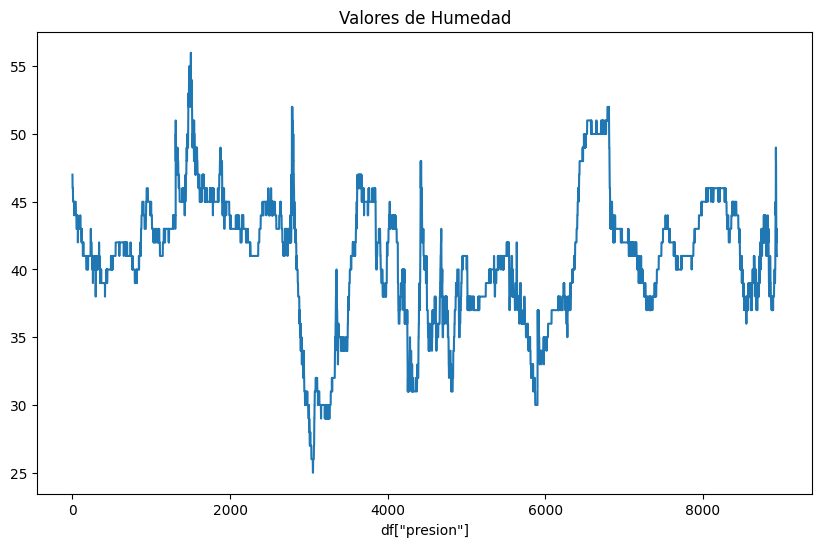

In [16]:
plt.figure(figsize=(10,6))
plt.plot(df["humedad"])
plt.xlabel("df[\"presion\"]")
plt.title("Valores de Humedad")
plt.show()

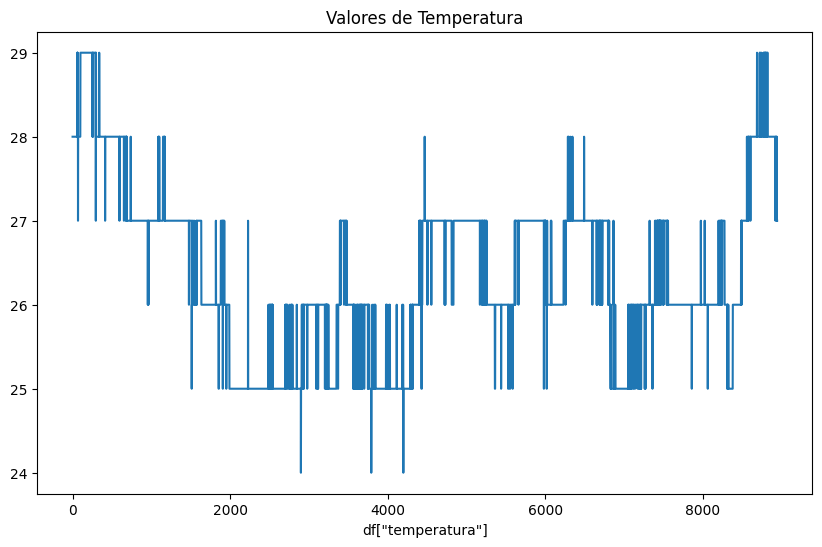

In [17]:
plt.figure(figsize=(10,6))
plt.plot(df["temperatura"])
plt.xlabel("df[\"temperatura\"]")
plt.title("Valores de Temperatura")
plt.show()

In [18]:
df.set_index('fecha',inplace=True)
df

,gas,temperatura,humedad,luminosidad,presion,fecha_unix
fecha,,,,,,
2024-11-15 13:08:56.454,592,28,47,485,94.76,1731686936454
2024-11-15 13:09:57.476,765,28,46,529,94.76,1731686997476
2024-11-15 13:10:58.489,695,28,46,508,94.76,1731687058489
2024-11-15 13:11:59.511,535,28,46,510,94.77,1731687119511
2024-11-15 13:13:00.982,528,28,46,510,94.76,1731687180982
...,...,...,...,...,...,...
2024-11-21 20:39:44.753,2905,27,41,307,95.11,1732232384753
2024-11-21 20:40:45.443,3103,27,41,310,95.11,1732232445443
2024-11-21 20:41:46.926,2868,27,41,311,95.11,1732232506926


# PreProcesado

* Limpiar y Generar indice

In [19]:
df_clean = df.drop(columns=['fecha_unix'])
df_clean = df_clean.reset_index(drop=True)
df_clean

,gas,temperatura,humedad,luminosidad,presion
0,592,28,47,485,94.76
1,765,28,46,529,94.76
2,695,28,46,508,94.76
3,535,28,46,510,94.77
4,528,28,46,510,94.76
...,...,...,...,...,...
8938,2905,27,41,307,95.11
8939,3103,27,41,310,95.11
8940,2868,27,41,311,95.11
8941,3055,27,41,330,95.11


* Escalar datos

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df_clean.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=list(df_clean.columns))

target_scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled[['temperatura', 'humedad']] = target_scaler.fit_transform(df_clean[['temperatura', 'humedad']].to_numpy())
df_scaled = df_scaled.astype(float)

df_scaled

,gas,temperatura,humedad,luminosidad,presion
0,0.152262,0.8,0.709677,0.467695,0.222222
1,0.210668,0.8,0.677419,0.510125,0.222222
2,0.187036,0.8,0.677419,0.489875,0.222222
3,0.133018,0.8,0.677419,0.491803,0.240741
4,0.130655,0.8,0.677419,0.491803,0.222222
...,...,...,...,...,...
8938,0.933153,0.6,0.516129,0.296046,0.870370
8939,1.000000,0.6,0.516129,0.298939,0.870370
8940,0.920662,0.6,0.516129,0.299904,0.870370
8941,0.983795,0.6,0.516129,0.318226,0.870370


# Exportar Scaler para denormalizacion a futuro

In [21]:
import joblib
joblib.dump(target_scaler,'../out/target-scaler.gz')

['../out/target-scaler.gz']

* Preparación de Datos

In [22]:
# Single step dataset preparation
def singleStepSampler(df, window):
    xRes = []
    yRes = []
    for i in range(0, len(df) - window):
        res = []
        for j in range(0, window):
            r = []
            for col in df.columns:
                r.append(df[col][i + j])
            res.append(r)
        xRes.append(res)
        yRes.append(df[['temperatura', 'humedad']].iloc[i + window].values)
    return np.array(xRes), np.array(yRes)

* Separación de datos

In [25]:
VENTANA = 60 # 60 minutos
SPLIT = 0.85
(xVal, yVal) = singleStepSampler(df_scaled, VENTANA)
X_train = xVal[:int(SPLIT * len(xVal))]
y_train = yVal[:int(SPLIT * len(yVal))]
X_test = xVal[int(SPLIT * len(xVal)):]
y_test = yVal[int(SPLIT * len(yVal)):]

# Implementación de Modelo

In [26]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, GRU, Input

In [30]:
timesteps = 60
num_features = 5

In [35]:

inputs = keras.Input(shape=(timesteps, num_features),batch_size=32)
x = keras.layers.LSTM(10,activation='relu')
x = x(inputs)
outputs = keras.layers.Dense(2)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()


#model = Sequential()
#model.add(LSTM(200, activation='relu', input_shape=(timesteps,num_features),unroll=False))
#model.add(Dropout(0.2))
#model.add(Dense(2))
#model.compile(optimizer='adam', loss='mse', metrics=["mae"])
#model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (32, 60, 5)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (32, 10)               │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 2)                │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 662 (2.59 KB)

 Trainable params: 662 (2.59 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1843 - mae: 0.3664
Epoch 2/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mae: 0.0419
Epoch 3/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - mae: 0.0254
Epoch 4/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - mae: 0.0219
Epoch 5/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012 - mae: 0.0197


# Desempeño del modelo

In [38]:
history.history.keys()

dict_keys(['loss', 'mae'])

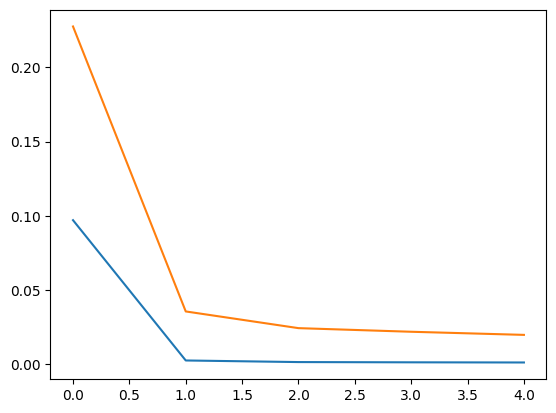

In [39]:
plt.plot(history.history["loss"])
plt.plot(history.history["mae"])
plt.legend
plt.show()

# Grafico con predicciones de otro color

In [40]:
d

NameError: name 'd' is not defined

In [41]:
# Forecast Plot with Dates on X-axis
predicted_values = model.predict(X_test)
predicted_values

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.39283153, 0.5537992 ],
       [0.3950574 , 0.5535626 ],
       [0.39327437, 0.5549157 ],
       ...,
       [0.75159794, 0.6167429 ],
       [0.7375474 , 0.6012918 ],
       [0.73380196, 0.59580314]], dtype=float32)

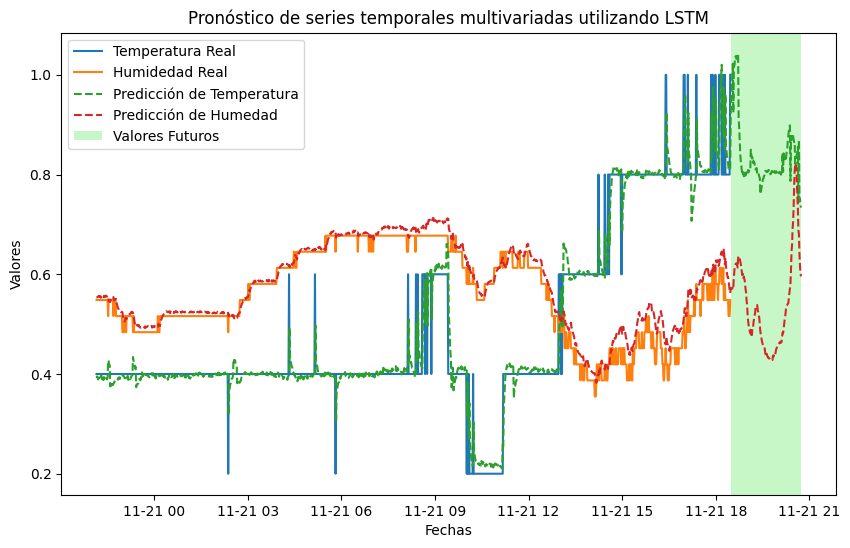

In [42]:
d = {
    'Predicted_Temp': predicted_values[:, 0],
    'Predicted_Humidity': predicted_values[:, 1],
    'Actual_Temp': y_test[:, 0],
    'Actual_Humidity': y_test[:, 1],
}

d = pd.DataFrame(d)
d.index = df.index[-len(y_test):]  # Assigning the correct date index

fig, ax = plt.subplots(figsize=(10, 6))
#  highlight the  forecast
highlight_start = int(len(d) * 0.9)
highlight_end = len(d) - 1  # Adjusted to stay within bounds
# Plot the actual values
plt.plot(d[['Actual_Temp', 'Actual_Humidity']][:highlight_start], label=['Temperatura Real', 'Humidedad Real'])

# Plot predicted values with a dashed line
plt.plot(d[['Predicted_Temp', 'Predicted_Humidity']], label=['Predicción de Temperatura', 'Predicción de Humedad'], linestyle='--')

# Highlight the forecasted portion with a different color
plt.axvspan(d.index[highlight_start], d.index[highlight_end], facecolor='lightgreen', alpha=0.5, label='Valores Futuros')

plt.title('Pronóstico de series temporales multivariadas utilizando LSTM')
plt.xlabel('Fechas')
plt.ylabel('Valores')
ax.legend()
plt.show()

# Denormalización Algebraica

In [43]:
"""
res*diff(range(Ali))+min(Ali)? That's not really a coding question, though, ... more algebra. 

It is the inverse of the transformation you applied (Ali - min(Ali))/diff(range(Ali)), unless I made an error. You may have to save ranges and mins for each row or column or whatever you're normalizing here. – 
Frank
Commented Sep 19, 2013 at 18:58 ""
"
"""
predicted_values_inverse = target_scaler.inverse_transform(predicted_values)
y_test_inverse = target_scaler.inverse_transform(y_test)

dinv = {
    'Predicted_Temp': predicted_values_inverse[:, 0],
    'Predicted_Humidity': predicted_values_inverse[:, 1],
    'Actual_Temp': y_test_inverse[:, 0],
    'Actual_Humidity': y_test_inverse[:, 1],
}

dinv = pd.DataFrame(dinv)
dinv.index = df.index[-len(y_test_inverse):]  # Assigning the correct date index

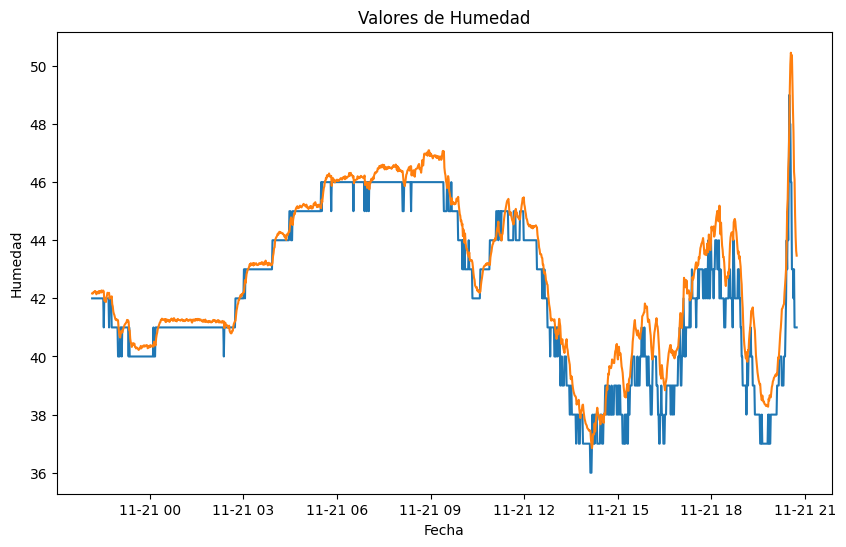

In [44]:
plt.figure(figsize=(10,6))
plt.plot(dinv["Actual_Humidity"])
plt.plot(dinv["Predicted_Humidity"])
plt.xlabel("Fecha")
plt.ylabel("Humedad")
plt.title("Valores de Humedad")
plt.show()

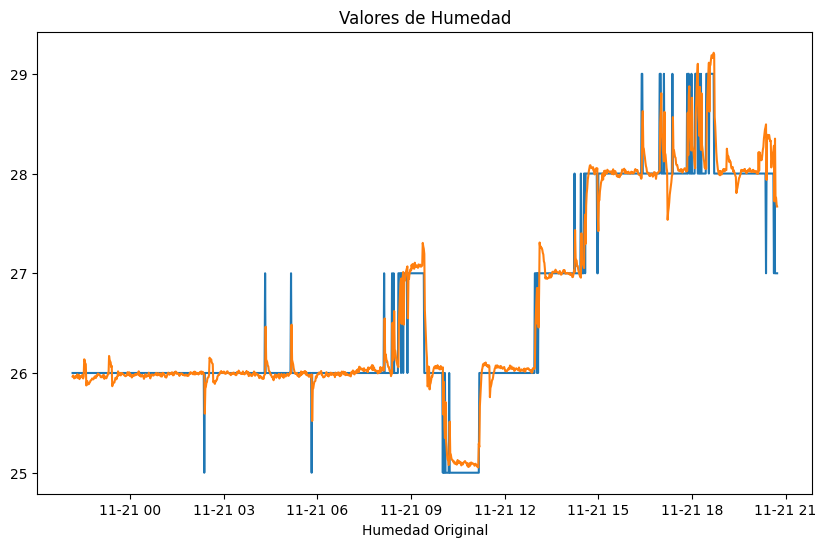

In [45]:
plt.figure(figsize=(10,6))
plt.plot(dinv["Actual_Temp"])
plt.plot(dinv["Predicted_Temp"])
plt.xlabel("Humedad Original")
plt.title("Valores de Humedad")
plt.show()

# Exportar Modelo Nivel Alto

In [48]:
H_MODEL_PATH = "../out/HIGH_LEVEL_MODEL/model.keras"
L_MODEL_PATH = "../out/LOW_LEVEL_MODEL/"
LITE_MODEL_PATH = "../out/LITE_MODEL"

In [49]:
model.save(H_MODEL_PATH)

# Cargar Modelo

In [52]:
import tensorflow as tf
modelo_cargado = tf.keras.models.load_model(H_MODEL_PATH)

In [53]:
modelo_cargado.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.39283153, 0.5537992 ],
       [0.3950574 , 0.5535626 ],
       [0.39327437, 0.5549157 ],
       ...,
       [0.75159794, 0.6167429 ],
       [0.7375474 , 0.6012918 ],
       [0.73380196, 0.59580314]], dtype=float32)

# Exportar Modelo Nivel Bajo

In [54]:
tf.saved_model.save(model,L_MODEL_PATH)

INFO:tensorflow:Assets written to: ../out/LOW_LEVEL_MODEL/assets


INFO:tensorflow:Assets written to: ../out/LOW_LEVEL_MODEL/assets


# Convertir a modelo Lite para Microcontroladores

In [55]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Optionally, apply optimizations (e.g., quantization)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Apply optimizations like quantization
# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open(f'{LITE_MODEL_PATH}/model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Nico\AppData\Local\Temp\tmpkd8hy1ca\assets


INFO:tensorflow:Assets written to: C:\Users\Nico\AppData\Local\Temp\tmpkd8hy1ca\assets


Saved artifact at 'C:\Users\Nico\AppData\Local\Temp\tmpkd8hy1ca'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(32, 60, 5), dtype=tf.float32, name='keras_tensor_9')
Output Type:
  TensorSpec(shape=(32, 2), dtype=tf.float32, name=None)
Captures:
  2522801338512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2522801338896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2522801340240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2522801340048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2522801339088: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [56]:
converter = tf.lite.TFLiteConverter.from_saved_model(L_MODEL_PATH)

# Optionally, apply optimizations (e.g., quantization)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Apply optimizations like quantization
# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open(f'{LITE_MODEL_PATH}/model.tflite', 'wb') as f:
    f.write(tflite_model)

# Exportar X_test para probar en microprocesador

In [ ]:
np.save('../out/X-test.npy',X_test)

In [ ]:
predict = model.predict(X_test[:32])
len(predict)

In [ ]:
output = np.load("../out/output.npy")
output
len(predict)

In [ ]:
plt.plot(output)
plt.plot(predict)